# Assessing feature importance via random decision forests
***

## 1 Dataset: Energy efficiency


### 1.1 Description
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


### 1.2 Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 
1. X1	Relative Compactness 
2. X2	Surface Area 
3. X3	Wall Area 
4. X4	Roof Area 
5. X5	Overall Height 
6. X6	Orientation 
7. X7	Glazing Area 
8. X8	Glazing Area Distribution 
9. y1	Heating Load 
10. y2	Cooling Load

### 1.3 Link 
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

***
## 2 Load libraries and dataset

### 2.1 Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Display graphics in Jupyter Notebook
%matplotlib inlineimport matplotlib.pyplot as plt

### 2.2 Load .xlsx file

In [4]:
dataset = pd.read_excel('ENB2012_data.xlsx')

# Show 5 rows
dataset.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


***
## 3. Split dataset in train and test subsets

In [5]:
# Generate new class attribute. Is y1+y2 above average? 1= yes / 0 = no
dataset['aboveAVG'] = np.where((dataset['Y1'] + dataset['Y2'])>=(dataset['Y1'].mean() + dataset['Y2'].mean()), 1, 0)
dataset.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,aboveAVG
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1


In [6]:
# Values of target
y = dataset['aboveAVG'].values

# Values of attributes
dataset = dataset.drop(['Y1', 'Y2', 'aboveAVG'], axis=1)
X = dataset.values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

***
## 4. Random Forest Classifier

In [7]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train) # fit model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***
## 5 Assessing feature importance
### 5.1 Create data frame with features and related importance

In [8]:
result = pd.DataFrame()
result['feature'] = dataset.columns # column's names
result['importance'] = forest.feature_importances_ # values
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
3,X4,0.236409
1,X2,0.233183
0,X1,0.228812
4,X5,0.228704
2,X3,0.024416
6,X7,0.021708
7,X8,0.021104
5,X6,0.005666


### 5.2 Display results in bar chart

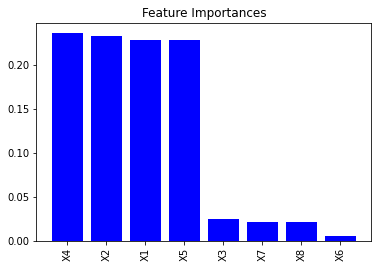

In [9]:
plt.title('Feature Importances')
plt.bar(range(len(result['feature'])), result['importance'], color='blue', align='center')
plt.xticks(range(len(result['feature'])), result['feature'], rotation=90)

plt.show()

***
## 6 Conclusion
"Feature importance" measure based on Gini Importance or Mean Deacrease in Impurity (MDI), provided by Random Forest Classifier, allows us to  say that "X4", "X2", "X1" and "X5" features are very important to correctly label new entries. On ther otherhand, "X6" maybe could be removed from the analysis.